In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
# loading data
data = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [79]:
data.shape

(1000, 2)

In [80]:
data.isna().sum()

Review    0
Liked     0
dtype: int64

In [81]:
data['Review'][349]

'I have eaten here multiple times, and each time the food was delicious.'

In [82]:
import nltk
from nltk import sent_tokenize, word_tokenize, pos_tag
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer
from nltk.util import ngrams

In [83]:
data['sent_tokens'] = data['Review'].apply(lambda x : sent_tokenize(x))
data.head()

,Review,Liked,sent_tokens
0,Wow... Loved this place.,1,"[Wow..., Loved this place.]"
1,Crust is not good.,0,[Crust is not good.]
2,Not tasty and the texture was just nasty.,0,[Not tasty and the texture was just nasty.]
3,Stopped by during the late May bank holiday of...,1,[Stopped by during the late May bank holiday o...
4,The selection on the menu was great and so wer...,1,[The selection on the menu was great and so we...


In [84]:
data['word_tokens'] = data['Review'].apply(lambda x : word_tokenize(x))
data.tail()

,Review,Liked,sent_tokens,word_tokens
995,I think food should have flavor and texture an...,0,[I think food should have flavor and texture a...,"[I, think, food, should, have, flavor, and, te..."
996,Appetite instantly gone.,0,[Appetite instantly gone.],"[Appetite, instantly, gone, .]"
997,Overall I was not impressed and would not go b...,0,[Overall I was not impressed and would not go ...,"[Overall, I, was, not, impressed, and, would, ..."
998,"The whole experience was underwhelming, and I ...",0,"[The whole experience was underwhelming, and I...","[The, whole, experience, was, underwhelming, ,..."
999,"Then, as if I hadn't wasted enough of my life ...",0,"[Then, as if I hadn't wasted enough of my life...","[Then, ,, as, if, I, had, n't, wasted, enough,..."


In [85]:
data['pos_tags'] = data['word_tokens'].apply(lambda x : pos_tag(x))
data.head()

,Review,Liked,sent_tokens,word_tokens,pos_tags
0,Wow... Loved this place.,1,"[Wow..., Loved this place.]","[Wow, ..., Loved, this, place, .]","[(Wow, NNP), (..., :), (Loved, VBD), (this, DT..."
1,Crust is not good.,0,[Crust is not good.],"[Crust, is, not, good, .]","[(Crust, NNP), (is, VBZ), (not, RB), (good, JJ..."
2,Not tasty and the texture was just nasty.,0,[Not tasty and the texture was just nasty.],"[Not, tasty, and, the, texture, was, just, nas...","[(Not, RB), (tasty, JJ), (and, CC), (the, DT),..."
3,Stopped by during the late May bank holiday of...,1,[Stopped by during the late May bank holiday o...,"[Stopped, by, during, the, late, May, bank, ho...","[(Stopped, VBN), (by, IN), (during, IN), (the,..."
4,The selection on the menu was great and so wer...,1,[The selection on the menu was great and so we...,"[The, selection, on, the, menu, was, great, an...","[(The, DT), (selection, NN), (on, IN), (the, D..."


In [86]:
data['bi_grams'] = data['word_tokens'].apply(lambda x : list(ngrams(x, 2)))
data.head()

,Review,Liked,sent_tokens,word_tokens,pos_tags,bi_grams
0,Wow... Loved this place.,1,"[Wow..., Loved this place.]","[Wow, ..., Loved, this, place, .]","[(Wow, NNP), (..., :), (Loved, VBD), (this, DT...","[(Wow, ...), (..., Loved), (Loved, this), (thi..."
1,Crust is not good.,0,[Crust is not good.],"[Crust, is, not, good, .]","[(Crust, NNP), (is, VBZ), (not, RB), (good, JJ...","[(Crust, is), (is, not), (not, good), (good, .)]"
2,Not tasty and the texture was just nasty.,0,[Not tasty and the texture was just nasty.],"[Not, tasty, and, the, texture, was, just, nas...","[(Not, RB), (tasty, JJ), (and, CC), (the, DT),...","[(Not, tasty), (tasty, and), (and, the), (the,..."
3,Stopped by during the late May bank holiday of...,1,[Stopped by during the late May bank holiday o...,"[Stopped, by, during, the, late, May, bank, ho...","[(Stopped, VBN), (by, IN), (during, IN), (the,...","[(Stopped, by), (by, during), (during, the), (..."
4,The selection on the menu was great and so wer...,1,[The selection on the menu was great and so we...,"[The, selection, on, the, menu, was, great, an...","[(The, DT), (selection, NN), (on, IN), (the, D...","[(The, selection), (selection, on), (on, the),..."


In [87]:
data['bi_grams'][:10]

0    [(Wow, ...), (..., Loved), (Loved, this), (thi...
1     [(Crust, is), (is, not), (not, good), (good, .)]
2    [(Not, tasty), (tasty, and), (and, the), (the,...
3    [(Stopped, by), (by, during), (during, the), (...
4    [(The, selection), (selection, on), (on, the),...
5    [(Now, I), (I, am), (am, getting), (getting, a...
6    [(Honeslty, it), (it, did), (did, n't), (n't, ...
7    [(The, potatoes), (potatoes, were), (were, lik...
8    [(The, fries), (fries, were), (were, great), (...
9             [(A, great), (great, touch), (touch, .)]
Name: bi_grams, dtype: object

In [88]:
data['tri_grams'] = data['word_tokens'].apply(lambda x : list(ngrams(x, 3)))
data.head()

,Review,Liked,sent_tokens,word_tokens,pos_tags,bi_grams,tri_grams
0,Wow... Loved this place.,1,"[Wow..., Loved this place.]","[Wow, ..., Loved, this, place, .]","[(Wow, NNP), (..., :), (Loved, VBD), (this, DT...","[(Wow, ...), (..., Loved), (Loved, this), (thi...","[(Wow, ..., Loved), (..., Loved, this), (Loved..."
1,Crust is not good.,0,[Crust is not good.],"[Crust, is, not, good, .]","[(Crust, NNP), (is, VBZ), (not, RB), (good, JJ...","[(Crust, is), (is, not), (not, good), (good, .)]","[(Crust, is, not), (is, not, good), (not, good..."
2,Not tasty and the texture was just nasty.,0,[Not tasty and the texture was just nasty.],"[Not, tasty, and, the, texture, was, just, nas...","[(Not, RB), (tasty, JJ), (and, CC), (the, DT),...","[(Not, tasty), (tasty, and), (and, the), (the,...","[(Not, tasty, and), (tasty, and, the), (and, t..."
3,Stopped by during the late May bank holiday of...,1,[Stopped by during the late May bank holiday o...,"[Stopped, by, during, the, late, May, bank, ho...","[(Stopped, VBN), (by, IN), (during, IN), (the,...","[(Stopped, by), (by, during), (during, the), (...","[(Stopped, by, during), (by, during, the), (du..."
4,The selection on the menu was great and so wer...,1,[The selection on the menu was great and so we...,"[The, selection, on, the, menu, was, great, an...","[(The, DT), (selection, NN), (on, IN), (the, D...","[(The, selection), (selection, on), (on, the),...","[(The, selection, on), (selection, on, the), (..."


In [92]:
import unicodedata
from textblob import TextBlob

In [93]:
data['polarity'] = data['Review'].apply(lambda x : TextBlob(x).sentiment.polarity)
data.head()

,Review,Liked,sent_tokens,word_tokens,pos_tags,bi_grams,tri_grams,polarity
0,Wow... Loved this place.,1,"[Wow..., Loved this place.]","[Wow, ..., Loved, this, place, .]","[(Wow, NNP), (..., :), (Loved, VBD), (this, DT...","[(Wow, ...), (..., Loved), (Loved, this), (thi...","[(Wow, ..., Loved), (..., Loved, this), (Loved...",0.40
1,Crust is not good.,0,[Crust is not good.],"[Crust, is, not, good, .]","[(Crust, NNP), (is, VBZ), (not, RB), (good, JJ...","[(Crust, is), (is, not), (not, good), (good, .)]","[(Crust, is, not), (is, not, good), (not, good...",-0.35
2,Not tasty and the texture was just nasty.,0,[Not tasty and the texture was just nasty.],"[Not, tasty, and, the, texture, was, just, nas...","[(Not, RB), (tasty, JJ), (and, CC), (the, DT),...","[(Not, tasty), (tasty, and), (and, the), (the,...","[(Not, tasty, and), (tasty, and, the), (and, t...",-1.00
3,Stopped by during the late May bank holiday of...,1,[Stopped by during the late May bank holiday o...,"[Stopped, by, during, the, late, May, bank, ho...","[(Stopped, VBN), (by, IN), (during, IN), (the,...","[(Stopped, by), (by, during), (during, the), (...","[(Stopped, by, during), (by, during, the), (du...",0.20
4,The selection on the menu was great and so wer...,1,[The selection on the menu was great and so we...,"[The, selection, on, the, menu, was, great, an...","[(The, DT), (selection, NN), (on, IN), (the, D...","[(The, selection), (selection, on), (on, the),...","[(The, selection, on), (selection, on, the), (...",0.80


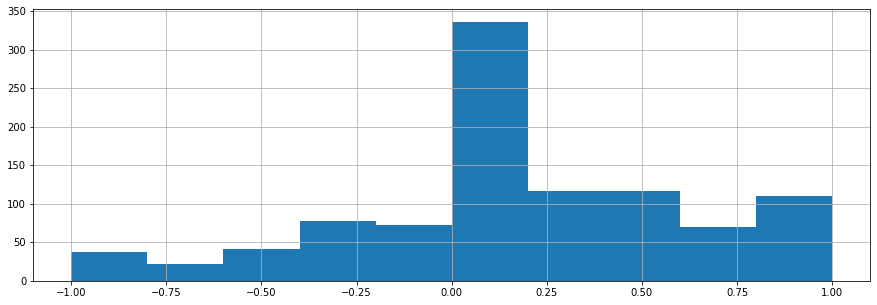

In [98]:
data['polarity'].hist(figsize = (15,5))
plt.show()

In [99]:
data['openion'] = ['negative' if i < 0 else 'positive' if i > 0 else 'neutral' for i in data['polarity']]
data.head()

,Review,Liked,sent_tokens,word_tokens,pos_tags,bi_grams,tri_grams,polarity,openion
0,Wow... Loved this place.,1,"[Wow..., Loved this place.]","[Wow, ..., Loved, this, place, .]","[(Wow, NNP), (..., :), (Loved, VBD), (this, DT...","[(Wow, ...), (..., Loved), (Loved, this), (thi...","[(Wow, ..., Loved), (..., Loved, this), (Loved...",0.40,positive
1,Crust is not good.,0,[Crust is not good.],"[Crust, is, not, good, .]","[(Crust, NNP), (is, VBZ), (not, RB), (good, JJ...","[(Crust, is), (is, not), (not, good), (good, .)]","[(Crust, is, not), (is, not, good), (not, good...",-0.35,negative
2,Not tasty and the texture was just nasty.,0,[Not tasty and the texture was just nasty.],"[Not, tasty, and, the, texture, was, just, nas...","[(Not, RB), (tasty, JJ), (and, CC), (the, DT),...","[(Not, tasty), (tasty, and), (and, the), (the,...","[(Not, tasty, and), (tasty, and, the), (and, t...",-1.00,negative
3,Stopped by during the late May bank holiday of...,1,[Stopped by during the late May bank holiday o...,"[Stopped, by, during, the, late, May, bank, ho...","[(Stopped, VBN), (by, IN), (during, IN), (the,...","[(Stopped, by), (by, during), (during, the), (...","[(Stopped, by, during), (by, during, the), (du...",0.20,positive
4,The selection on the menu was great and so wer...,1,[The selection on the menu was great and so we...,"[The, selection, on, the, menu, was, great, an...","[(The, DT), (selection, NN), (on, IN), (the, D...","[(The, selection), (selection, on), (on, the),...","[(The, selection, on), (selection, on, the), (...",0.80,positive


In [107]:
data.iloc[:, [-1,-2]].head(10)

,openion,polarity
0,positive,0.40
1,negative,-0.35
2,negative,-1.00
3,positive,0.20
4,positive,0.80
5,negative,-0.50
6,positive,0.30
7,neutral,0.00
8,positive,0.80
9,positive,0.80


In [110]:
stemmer = PorterStemmer()
data['stemming'] = data['word_tokens'].apply(lambda x : [stemmer.stem(i) for i in x])
data.head()

,Review,Liked,sent_tokens,word_tokens,pos_tags,bi_grams,tri_grams,polarity,openion,stemming
0,Wow... Loved this place.,1,"[Wow..., Loved this place.]","[Wow, ..., Loved, this, place, .]","[(Wow, NNP), (..., :), (Loved, VBD), (this, DT...","[(Wow, ...), (..., Loved), (Loved, this), (thi...","[(Wow, ..., Loved), (..., Loved, this), (Loved...",0.40,positive,"[wow, ..., love, thi, place, .]"
1,Crust is not good.,0,[Crust is not good.],"[Crust, is, not, good, .]","[(Crust, NNP), (is, VBZ), (not, RB), (good, JJ...","[(Crust, is), (is, not), (not, good), (good, .)]","[(Crust, is, not), (is, not, good), (not, good...",-0.35,negative,"[crust, is, not, good, .]"
2,Not tasty and the texture was just nasty.,0,[Not tasty and the texture was just nasty.],"[Not, tasty, and, the, texture, was, just, nas...","[(Not, RB), (tasty, JJ), (and, CC), (the, DT),...","[(Not, tasty), (tasty, and), (and, the), (the,...","[(Not, tasty, and), (tasty, and, the), (and, t...",-1.00,negative,"[not, tasti, and, the, textur, wa, just, nasti..."
3,Stopped by during the late May bank holiday of...,1,[Stopped by during the late May bank holiday o...,"[Stopped, by, during, the, late, May, bank, ho...","[(Stopped, VBN), (by, IN), (during, IN), (the,...","[(Stopped, by), (by, during), (during, the), (...","[(Stopped, by, during), (by, during, the), (du...",0.20,positive,"[stop, by, dure, the, late, may, bank, holiday..."
4,The selection on the menu was great and so wer...,1,[The selection on the menu was great and so we...,"[The, selection, on, the, menu, was, great, an...","[(The, DT), (selection, NN), (on, IN), (the, D...","[(The, selection), (selection, on), (on, the),...","[(The, selection, on), (selection, on, the), (...",0.80,positive,"[the, select, on, the, menu, wa, great, and, s..."


In [112]:
data[['Review', 'stemming']].head(10)

,Review,stemming
0,Wow... Loved this place.,"[wow, ..., love, thi, place, .]"
1,Crust is not good.,"[crust, is, not, good, .]"
2,Not tasty and the texture was just nasty.,"[not, tasti, and, the, textur, wa, just, nasti..."
3,Stopped by during the late May bank holiday of...,"[stop, by, dure, the, late, may, bank, holiday..."
4,The selection on the menu was great and so wer...,"[the, select, on, the, menu, wa, great, and, s..."
5,Now I am getting angry and I want my damn pho.,"[now, I, am, get, angri, and, I, want, my, dam..."
6,Honeslty it didn't taste THAT fresh.),"[honeslti, it, did, n't, tast, that, fresh, ., )]"
7,The potatoes were like rubber and you could te...,"[the, potato, were, like, rubber, and, you, co..."
8,The fries were great too.,"[the, fri, were, great, too, .]"
9,A great touch.,"[A, great, touch, .]"


In [116]:
nltk.download('wordnet')
lemma = WordNetLemmatizer()
data['lemma'] = data['word_tokens'].apply(lambda x : [lemma.lemmatize(i) for i in x])
data.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LOKESH\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


,Review,Liked,sent_tokens,word_tokens,pos_tags,bi_grams,tri_grams,polarity,openion,stemming,lemma
0,Wow... Loved this place.,1,"[Wow..., Loved this place.]","[Wow, ..., Loved, this, place, .]","[(Wow, NNP), (..., :), (Loved, VBD), (this, DT...","[(Wow, ...), (..., Loved), (Loved, this), (thi...","[(Wow, ..., Loved), (..., Loved, this), (Loved...",0.40,positive,"[wow, ..., love, thi, place, .]","[Wow, ..., Loved, this, place, .]"
1,Crust is not good.,0,[Crust is not good.],"[Crust, is, not, good, .]","[(Crust, NNP), (is, VBZ), (not, RB), (good, JJ...","[(Crust, is), (is, not), (not, good), (good, .)]","[(Crust, is, not), (is, not, good), (not, good...",-0.35,negative,"[crust, is, not, good, .]","[Crust, is, not, good, .]"
2,Not tasty and the texture was just nasty.,0,[Not tasty and the texture was just nasty.],"[Not, tasty, and, the, texture, was, just, nas...","[(Not, RB), (tasty, JJ), (and, CC), (the, DT),...","[(Not, tasty), (tasty, and), (and, the), (the,...","[(Not, tasty, and), (tasty, and, the), (and, t...",-1.00,negative,"[not, tasti, and, the, textur, wa, just, nasti...","[Not, tasty, and, the, texture, wa, just, nast..."
3,Stopped by during the late May bank holiday of...,1,[Stopped by during the late May bank holiday o...,"[Stopped, by, during, the, late, May, bank, ho...","[(Stopped, VBN), (by, IN), (during, IN), (the,...","[(Stopped, by), (by, during), (during, the), (...","[(Stopped, by, during), (by, during, the), (du...",0.20,positive,"[stop, by, dure, the, late, may, bank, holiday...","[Stopped, by, during, the, late, May, bank, ho..."
4,The selection on the menu was great and so wer...,1,[The selection on the menu was great and so we...,"[The, selection, on, the, menu, was, great, an...","[(The, DT), (selection, NN), (on, IN), (the, D...","[(The, selection), (selection, on), (on, the),...","[(The, selection, on), (selection, on, the), (...",0.80,positive,"[the, select, on, the, menu, wa, great, and, s...","[The, selection, on, the, menu, wa, great, and..."


In [117]:
data[['Review','stemming', 'lemma']].tail()

,Review,stemming,lemma
995,I think food should have flavor and texture an...,"[I, think, food, should, have, flavor, and, te...","[I, think, food, should, have, flavor, and, te..."
996,Appetite instantly gone.,"[appetit, instantli, gone, .]","[Appetite, instantly, gone, .]"
997,Overall I was not impressed and would not go b...,"[overal, I, wa, not, impress, and, would, not,...","[Overall, I, wa, not, impressed, and, would, n..."
998,"The whole experience was underwhelming, and I ...","[the, whole, experi, wa, underwhelm, ,, and, I...","[The, whole, experience, wa, underwhelming, ,,..."
999,"Then, as if I hadn't wasted enough of my life ...","[then, ,, as, if, I, had, n't, wast, enough, o...","[Then, ,, a, if, I, had, n't, wasted, enough, ..."
